In [1]:
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
df = pd.read_csv('../datasets_raw/'  + 'ERCOT_DAM.csv')
freq = "H"

In [3]:
df

,ds,y,temperature_Houston
0,1/1/15 0:00,22.01,281.113500
1,1/1/15 10:00,28.33,278.697333
2,1/1/15 11:00,27.86,278.294667
3,1/1/15 12:00,25.79,278.352000
4,1/1/15 13:00,25.34,277.796000
...,...,...,...
25529,12/31/16 5:00,12.79,284.510000
25530,12/31/16 6:00,20.00,284.510000
25531,12/31/16 7:00,24.09,284.960000
25532,12/31/16 8:00,23.69,285.140000


In [4]:
df.describe()

,y,temperature_Houston
count,25534.000000,25534.000000
mean,26.157666,294.950493
std,26.807511,7.377139
min,1.260000,267.570000
25%,18.172500,290.680000
50%,22.280000,296.287167
75%,28.510000,299.988750
max,2239.950000,312.640000


In [5]:
if df["ds"].dtype == np.int64:
        df.loc[:, "ds"] = df.loc[:, "ds"].astype(str)
df.loc[:, "ds"] = pd.to_datetime(df.loc[:, "ds"])
df = df.set_index("ds")

In [6]:
df

,y,temperature_Houston
ds,,
2015-01-01 00:00:00,22.01,281.113500
2015-01-01 10:00:00,28.33,278.697333
2015-01-01 11:00:00,27.86,278.294667
2015-01-01 12:00:00,25.79,278.352000
2015-01-01 13:00:00,25.34,277.796000
...,...,...
2016-12-31 05:00:00,12.79,284.510000
2016-12-31 06:00:00,20.00,284.510000
2016-12-31 07:00:00,24.09,284.960000


<AxesSubplot:xlabel='ds'>

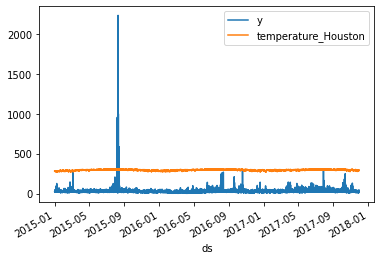

In [7]:
df.plot()

In [8]:
is_na = sum(df['y'].isnull())
print(is_na)

0


In [9]:
is_na = sum(df['temperature_Houston'].isnull())
print(is_na)

0


In [10]:
## resample to potentially avoid missing values?
df_re = df
df_re.resample('H').mean()

# df_re['ds'] = df_re.index.values
df_re = df_re[['y', 'temperature_Houston']]
df_re

,y,temperature_Houston
ds,,
2015-01-01 00:00:00,22.01,281.113500
2015-01-01 10:00:00,28.33,278.697333
2015-01-01 11:00:00,27.86,278.294667
2015-01-01 12:00:00,25.79,278.352000
2015-01-01 13:00:00,25.34,277.796000
...,...,...
2016-12-31 05:00:00,12.79,284.510000
2016-12-31 06:00:00,20.00,284.510000
2016-12-31 07:00:00,24.09,284.960000


In [11]:
sum(abs(df['y'] - df_re['y']))

0.0

In [12]:
sum(abs(df['temperature_Houston'] - df_re['temperature_Houston']))

0.0

## Fill missing Dates

In [13]:
df

,y,temperature_Houston
ds,,
2015-01-01 00:00:00,22.01,281.113500
2015-01-01 10:00:00,28.33,278.697333
2015-01-01 11:00:00,27.86,278.294667
2015-01-01 12:00:00,25.79,278.352000
2015-01-01 13:00:00,25.34,277.796000
...,...,...
2016-12-31 05:00:00,12.79,284.510000
2016-12-31 06:00:00,20.00,284.510000
2016-12-31 07:00:00,24.09,284.960000


In [14]:
data_len = len(df)
df_copy = df.copy(deep=True)
r = pd.date_range(start=df.index.min(), end=df.index.max(), freq=freq)
df = df.reindex(r).rename_axis("ds")
num_added = len(df) - data_len
print(num_added)

3


In [15]:
df

,y,temperature_Houston
ds,,
2015-01-01 00:00:00,22.01,281.113500
2015-01-01 01:00:00,21.39,280.601667
2015-01-01 02:00:00,21.00,280.253333
2015-01-01 03:00:00,20.72,280.198000
2015-01-01 04:00:00,21.18,279.752000
...,...,...
2017-11-29 20:00:00,24.97,295.150000
2017-11-29 21:00:00,23.55,295.820000
2017-11-29 22:00:00,22.41,296.370000


In [16]:
is_na = sum(df['y'].isnull())
is_na

3

In [17]:
is_na = sum(df['temperature_Houston'].isnull())
is_na

3

In [18]:
list(set(df.index.values) - set(df_copy.index.values))

[numpy.datetime64('2016-03-13T02:00:00.000000000'),
 numpy.datetime64('2015-03-08T02:00:00.000000000'),
 numpy.datetime64('2017-03-12T02:00:00.000000000')]

## fill missing values

In [19]:
def fill_missing(df, col, limit_linear=20):
    is_na = sum(df[col].isnull())
    print("is na :", is_na)
    series = df[col]
    series = series.interpolate(method="linear", limit=limit_linear, limit_direction="both")
    df[col] = series
    is_na = sum(df[col].isnull())
    print("remaining na :", is_na)
    return df

In [20]:
df = fill_missing(df, 'y')

is na : 3
remaining na : 0


In [21]:
df = fill_missing(df, 'temperature_Houston')

is na : 3
remaining na : 0


## log price, temp in celsius

In [22]:
df['temp_celsius_houston'] = df['temperature_Houston'].values -273.15
df = df.drop(columns=['temperature_Houston'])
df

,y,temp_celsius_houston
ds,,
2015-01-01 00:00:00,22.01,7.963500
2015-01-01 01:00:00,21.39,7.451667
2015-01-01 02:00:00,21.00,7.103333
2015-01-01 03:00:00,20.72,7.048000
2015-01-01 04:00:00,21.18,6.602000
...,...,...
2017-11-29 20:00:00,24.97,22.000000
2017-11-29 21:00:00,23.55,22.670000
2017-11-29 22:00:00,22.41,23.220000


In [23]:
df_log = df.copy(deep=True)
df_log['y'] = np.log(df['y'].values)

<AxesSubplot:xlabel='ds'>

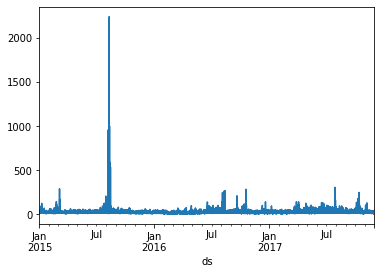

In [24]:
df['y'].plot()

<AxesSubplot:xlabel='ds'>

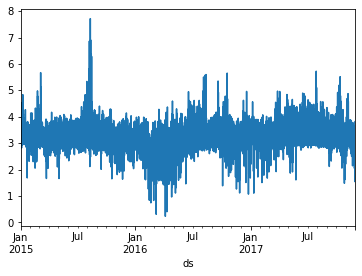

In [25]:
df_log['y'].plot()

<AxesSubplot:xlabel='ds'>

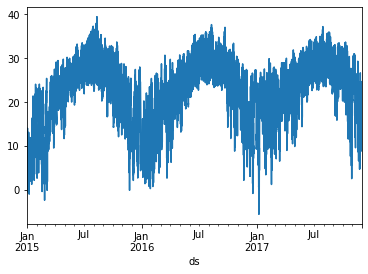

In [26]:
df['temp_celsius_houston'].plot()

In [27]:
df['ds'] = df.index.values
df = df.reset_index(drop=True)
df = df[['ds', 'y', 'temp_celsius_houston']]
df

,ds,y,temp_celsius_houston
0,2015-01-01 00:00:00,22.01,7.963500
1,2015-01-01 01:00:00,21.39,7.451667
2,2015-01-01 02:00:00,21.00,7.103333
3,2015-01-01 03:00:00,20.72,7.048000
4,2015-01-01 04:00:00,21.18,6.602000
...,...,...,...
25532,2017-11-29 20:00:00,24.97,22.000000
25533,2017-11-29 21:00:00,23.55,22.670000
25534,2017-11-29 22:00:00,22.41,23.220000
25535,2017-11-29 23:00:00,19.64,21.500000


In [28]:
df_log['ds'] = df_log.index.values
df_log = df_log.reset_index(drop=True)
df_log = df_log[['ds', 'y', 'temp_celsius_houston']]
df_log

,ds,y,temp_celsius_houston
0,2015-01-01 00:00:00,3.091497,7.963500
1,2015-01-01 01:00:00,3.062924,7.451667
2,2015-01-01 02:00:00,3.044522,7.103333
3,2015-01-01 03:00:00,3.031099,7.048000
4,2015-01-01 04:00:00,3.053057,6.602000
...,...,...,...
25532,2017-11-29 20:00:00,3.217675,22.000000
25533,2017-11-29 21:00:00,3.159126,22.670000
25534,2017-11-29 22:00:00,3.109507,23.220000
25535,2017-11-29 23:00:00,2.977568,21.500000


## Save

In [29]:
df.to_csv('../datasets/'  + 'price_ercot_dam.csv', index=False, float_format="%.2f")

In [30]:
df_log.to_csv('../datasets/'  + 'price_log_ercot_dam.csv', index=False, float_format="%.2f")